# Población campesina víctima
# Modelo AI
Creado por ivan gabriel corredor
24_07_2024

In [2]:
import numpy as np
import pandas as pd

In [3]:
coding: "latin-1"

In [4]:
#pd.options.display.max_info_rows= 50
pd.options.display.float_format = '{:.2f}'.format 
pd.options.display.max_rows = None
pd.options.display.max_columns = None
#pd.options.display.max_colwidth = 300

## Cargue de la información

In [6]:
## ruta entrada
p1 = "E:/GEIH/salidas/"
## ruta salida
p2 = "E:/GEIH/salidas/modelos/"

In [7]:
# cargue base 2022
df_vic2 = pd.read_csv(p1 + "geih_vic_22_b.csv", sep = ";", decimal=",", low_memory=False, index_col=False)

In [8]:
df_vic2.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 919459 entries, 0 to 919458
Data columns (total 386 columns):
 #    Column            Dtype  
---   ------            -----  
 0    Unnamed: 0        int64  
 1    DIRECTORIO        int64  
 2    SECUENCIA_P       int64  
 3    ORDEN             int64  
 4    P6016             int64  
 5    SEXO              int64  
 6    P6030S1           object 
 7    P6030S3           object 
 8    EDAD              int64  
 9    P6050             int64  
 10   P6083             int64  
 11   P6083S1           object 
 12   P6081             int64  
 13   P6081S1           object 
 14   P2057             int64  
 15   P2059             float64
 16   P2061             int64  
 17   ETNIA             int64  
 18   P6080S1           object 
 19   P6080S1A1         float64
 20   P6070             object 
 21   P6071             object 
 22   P6071S1           object 
 23   P3147S1           object 
 24   P3147S2           object 
 25   P3147S3           

In [9]:
print(list(df_vic2.columns))

['Unnamed: 0', 'DIRECTORIO', 'SECUENCIA_P', 'ORDEN', 'P6016', 'SEXO', 'P6030S1', 'P6030S3', 'EDAD', 'P6050', 'P6083', 'P6083S1', 'P6081', 'P6081S1', 'P2057', 'P2059', 'P2061', 'ETNIA', 'P6080S1', 'P6080S1A1', 'P6070', 'P6071', 'P6071S1', 'P3147S1', 'P3147S2', 'P3147S3', 'P3147S4', 'P3147S5', 'P3147S6', 'P3147S7', 'P3147S8', 'P3147S9', 'P3147S10', 'P3147S11', 'P3147S10A1', 'P6090', 'P6100', 'P6110', 'P6120', 'P1906S1', 'P1906S2', 'P1906S3', 'P1906S4', 'P1906S5', 'P1906S6', 'P1906S7', 'P1906S8', 'P6160', 'P6170', 'P3041', 'P3042', 'P3042S1', 'P3042S2', 'P3043', 'P3043S1', 'HOGAR', 'CLASE', 'P3038', 'P3039', 'AREA', 'MES', 'PERIODO', 'DPTO', 'PT', 'FEX_C18', 'LGB_NUMERICA', 'LGB_SECTORES', 'TRANS_NUMERICA', 'LGBT_NUMERICA', 'DISCAPACIDAD', 'DIFICULTAD', 'CAMPESINA', 'POB_MAY18', 'PER', 'REGIS', 'P6240', 'P6240S1', 'P6250', 'P6260', 'P6260S1', 'P6260S1A1', 'P6260S2', 'P6270', 'P6280', 'P6290', 'P6300', 'P6310', 'P6310S1', 'P6320', 'P6330', 'P6340', 'P6350', 'P6351', 'P6240S2', 'P3362S1', '

## Preprocesamiento

### Renombrar, seleccionar, crear variables

In [12]:
#renombrar variables educación
df_vic2.rename(columns= {"P6160": "leer_escribir", "P6170":"asiste_edu", 
                         "P3041":"institucion", "P3042":"nivel_edu",
                         "P3043": "titulo_edu"}, inplace = True)

# concatenar variables de identificación
df_vic2["ID_PER"] = df_vic2[['DIRECTORIO', 'SECUENCIA_P', 'ORDEN']].apply(lambda row: f"{row['DIRECTORIO']}_{row['SECUENCIA_P']}_{row['ORDEN']}", axis=1)

In [13]:
# seleccionar variables por temas
model1 = df_vic2[[
            # identificación persona: 'DIRECTORIO', 'SECUENCIA_P', 'ORDEN' 
            "ID_PER",
            # posición hogar, periodo y fac expansión
            'HOGAR', 'MES', 'FEX_C18',
            # campesinos
            'CAMPESINA_2', 'NO_CAMPESINA', 'FUERON_CAMPE', 
            # víctimas
            'ES_VICTIMA', 'ES_DESPLAZADO', 'DECADA_VIC', 'FEX_C_VIV', 'NO_VICTIMA', 
            # enfoques 
           'SEXO', 'EDAD','GRUPO_ETARIO', 'ETNIA', 'DISCAPACIDAD',
            'CLASE', 'DPTO',  'NOMBRE_DPTO', 'COD_DANE', 'CIUDAD',
            # Educación 
           'leer_escribir', 'asiste_edu', 'institucion', 'nivel_edu', 'titulo_edu',
            # mercado laboral
            'PT', "PET", "FT_x", "OCI", "DSI", "FFT_x",
            # vivienda
           'TIPO_VIVIENDA', 'MATERIAL_PAREDES',
           'COHABITACION', 'PER_CUARTO', 'HACI_NO_MITI', 'DEF_CUANTI', 'HACI_MITI', 
           'MAT_PISOS', 'COCINA', 'ACUEDUCTO', 'ALCANTARILLADO', 'ENERGIA', 'BASURAS',
           'DEF_CUALI', 'DEF_HABITACIONAL']]
# colocar variables en mayuscula
model1.columns = model1.columns.str.upper()

# convertir las variables al formato correcto
names = ['ES_VICTIMA', 'CAMPESINA_2','LEER_ESCRIBIR',
         'ASISTE_EDU', 'INSTITUCION', 'NIVEL_EDU',
         'TITULO_EDU', 'MATERIAL_PAREDES']
for i in names:
    model1[i] = pd.to_numeric(model1[i], downcast='integer', errors= 'coerce') #.astype('Int8')
    #model1[i] = model1[i].astype(float).astype(int)# cuando le coloco .loc no me toma el formato entero
    #model1[i] = pd.to_numeric(model1[i], errors='coerce').astype('Int32')

# crear variable categoríca objetivo

cond1= (model1["ES_VICTIMA"]==1) & (model1["CAMPESINA_2"]==1) # víctima - campesina
cond2= (model1["ES_VICTIMA"]==1) & (model1["CAMPESINA_2"]==0) # víctima - no campesina
cond3= (model1["ES_VICTIMA"]==0) & (model1["CAMPESINA_2"]==1) # no víctima - campesina
cond4= (model1["ES_VICTIMA"]==0) & (model1["CAMPESINA_2"]==0) # no víctima - no campesina

conditions = [cond1, cond2, cond3, cond4]
choices = [0,1, 2, 3]  # Assign distinct values for each condition

model1["TIPO_PER"] = np.select(conditions, choices, default=np.nan).astype(int)

C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_7452\2362945121.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model1[i] = pd.to_numeric(model1[i], downcast='integer', errors= 'coerce')#.astype('Int8')
C:\Users\ivan.corredor\AppData\Local\Temp\3\ipykernel_7452\2362945121.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  model1["TIPO_PER"] = np.select(conditions, choices, default=np.nan).astype(int)


In [14]:
# nueva selección
model2 = model1.drop(columns=['CAMPESINA_2', 'NO_CAMPESINA', 'ES_VICTIMA',
                             'ES_DESPLAZADO', 'NO_VICTIMA', 'ID_PER', 
                              'DPTO', 'COD_DANE', 'DECADA_VIC', 
                              'FEX_C_VIV', 'FEX_C18'])

#modelo 3
model3 = model1.drop(columns=['ES_DESPLAZADO',  'ID_PER', 
                              'DPTO', 'COD_DANE', 'DECADA_VIC',
                             'FEX_C_VIV', 'FEX_C18'])

In [110]:
# distribución original de la variable dependiente 
y["TIPO_PER"].value_counts(normalize=False)

TIPO_PER
3    661743
2    134447
1     84793
0     38476
Name: count, dtype: int64

### Pipeline 
Preprocesing: Imputar y escalar \
Balancear el data set \
Dividir la data entrenamiento y prueba \
Estimar el modelo random forest

In [142]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer

## separar las características de las etiquetas
    #características
X = model2.drop(columns=["TIPO_PER"])
    #variable objetivo
y = model2[["TIPO_PER"]]

# Numeric pipeline
num_pipeline = make_pipeline(
    SimpleImputer(strategy="constant", fill_value=0),
    StandardScaler())

# Categorical pipeline
cat_pipeline = make_pipeline(
    SimpleImputer(strategy="constant", fill_value="otras"), 
    OneHotEncoder(handle_unknown="ignore"))

# Column transformer
preprocessing = make_column_transformer(
    (num_pipeline, make_column_selector(dtype_include=np.number)),
    (cat_pipeline, make_column_selector(dtype_include=object)),
)

In [87]:
# distribución con over-sampling technique
y_train["TIPO_PER"].value_counts(normalize=False)

TIPO_PER
3    64000
2    40000
1    30781
0    30780
Name: count, dtype: int64

## Modelos

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

def metricas(y_test, y_pred):
  # Calcular métricas de desempeño
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average = 'micro')
  recall = recall_score(y_test, y_pred, average = 'micro')
  f1 = f1_score(y_test, y_pred, average = 'micro') #'micro', #'macro', 'weighted'
  conf_matrix = confusion_matrix(y_test, y_pred)
  class_report = classification_report(y_test, y_pred)

  # Imprimir métricas
  print("Accuracy:", accuracy)
  print("Precision:", precision)
  print("Recall:", recall)
  print("F1 Score:", f1)
  print("Confusion Matrix:\n", conf_matrix)
  print("Classification Report:\n", class_report)

  # Graficar la matriz de confusión
  plt.figure(figsize=(6, 6))
  plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
  plt.title("Matriz de Confusión")
  plt.colorbar()
  tick_marks = np.arange(4)
  plt.xticks(tick_marks, ["Clase 0", "Clase 1","Clase 2","Clase 3"], rotation=45)
  plt.yticks(tick_marks, ["Clase 0", "Clase 1", "Clase 2","Clase 3"])

  thresh = conf_matrix.max() / 2.
  for i, j in np.ndindex(conf_matrix.shape):
      plt.text(j, i, format(conf_matrix[i, j], 'd'),
              horizontalalignment="center",
              color="white" if conf_matrix[i, j] > thresh else "black")

  plt.ylabel("Etiqueta Verdadera")
  plt.xlabel("Etiqueta Predicha")
  plt.tight_layout()
  plt.show()

###  Modelo 1
#### original sample

Las clases de la variable dependiente tienen la distribución orginal

Accuracy: 0.7744453258950278
Precision: 0.7744453258950278
Recall: 0.7744453258950278
F1 Score: 0.7744453258950279
Confusion Matrix:
 [[  989   287  2489  1161]
 [  234  1511   503  8711]
 [  888   298 10548  5342]
 [  412  2839  3278 77741]]
Classification Report:
               precision    recall  f1-score   support

           0       0.39      0.20      0.27      4926
           1       0.31      0.14      0.19     10959
           2       0.63      0.62      0.62     17076
           3       0.84      0.92      0.88     84270

    accuracy                           0.77    117231
   macro avg       0.54      0.47      0.49    117231
weighted avg       0.74      0.77      0.75    117231



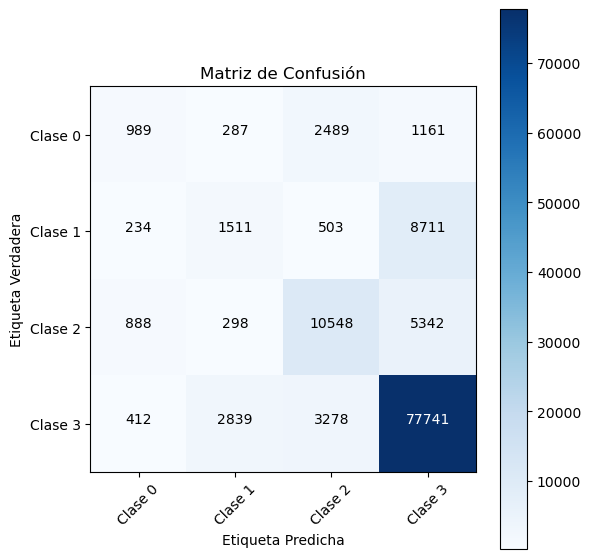

In [233]:
# Split the dataset into training and test sets
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Full pipeline with preprocessing, SMOTE, and classifier
pipeline = ImbPipeline([
    ('preprocessing', preprocessing),
    ('classifier', RandomForestClassifier(n_estimators=100,
                                          max_depth=2,
                                          random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# metricas
y_pred = rnd_clfb.predict(X_test)
metricas(y_test, y_pred) 

#### Importancia de las características

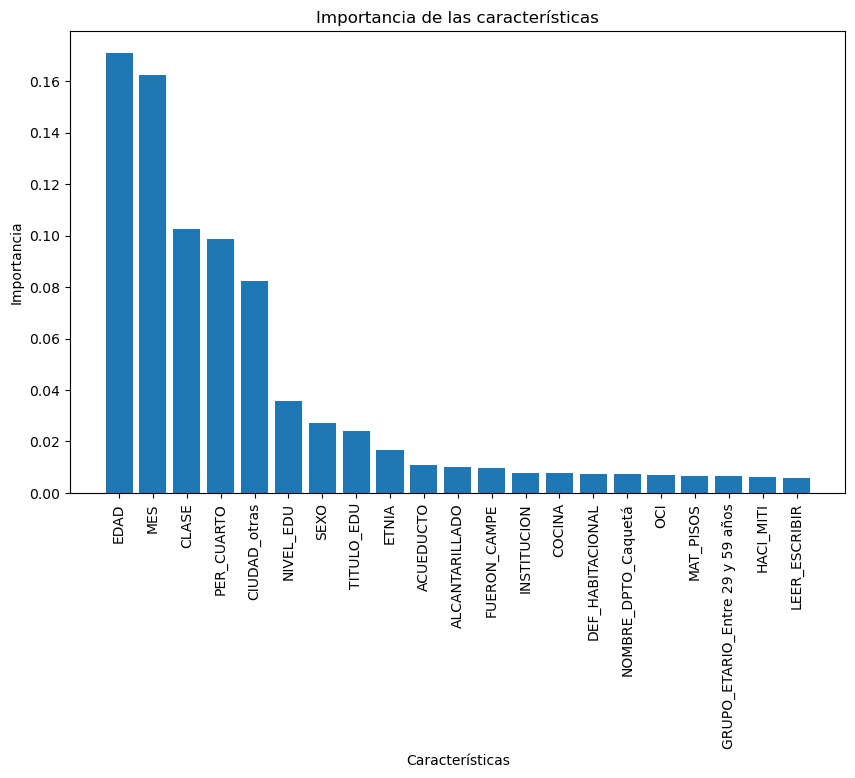

In [229]:
import matplotlib.pyplot as plt
import numpy as np

# Access the feature importances from the RandomForestClassifier
importances = rnd_clf.named_steps['randomforestclassifier'].feature_importances_

# Get feature names from preprocessing pipeline
preprocessor = rnd_clf.named_steps['columntransformer']

# Extract feature names from numeric and categorical pipelines
num_features = preprocessor.transformers_[0][1].named_steps['simpleimputer'].feature_names_in_
cat_features = preprocessor.transformers_[1][1].named_steps['onehotencoder'].get_feature_names_out(input_features=X_train.select_dtypes(include=[object]).columns)

# Combine feature names
feature_names = np.concatenate([num_features, cat_features])
#features = X_train.columns

# Sort the importances
indices = np.argsort(importances)[::-1] #adding [::-1] reverses the sorted indices to achieve a descending order.
# Select the top 21 features
top_indices = indices[:21]
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.title("Importancia de las características")
plt.bar(range(21), importances[top_indices], align="center")
#plt.xticks(range(21), features[top_indices], rotation=90)
plt.xticks(range(21), feature_names[top_indices], rotation=90)
plt.xlabel("Características")
plt.ylabel("Importancia")
plt.show()


###  modelo 2 
#### SMOTE over-simpling

It apply SMOTE  to generate synthetic samples to balance the dataset, especially when you want to avoid exact duplicates.

C:\Users\ivan.corredor\AppData\Local\anaconda3\Lib\site-packages\imblearn\pipeline.py:297: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)


Accuracy: 0.541034577206056
Precision: 0.541034577206056
Recall: 0.541034577206056
F1 Score: 0.541034577206056
Confusion Matrix:
 [[71972 10882 41850  7645]
 [12856 55910  9352 54230]
 [44781  4696 65106 17766]
 [ 5925 21003 11988 93433]]
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.54      0.54    132349
           1       0.60      0.42      0.50    132348
           2       0.51      0.49      0.50    132349
           3       0.54      0.71      0.61    132349

    accuracy                           0.54    529395
   macro avg       0.55      0.54      0.54    529395
weighted avg       0.55      0.54      0.54    529395



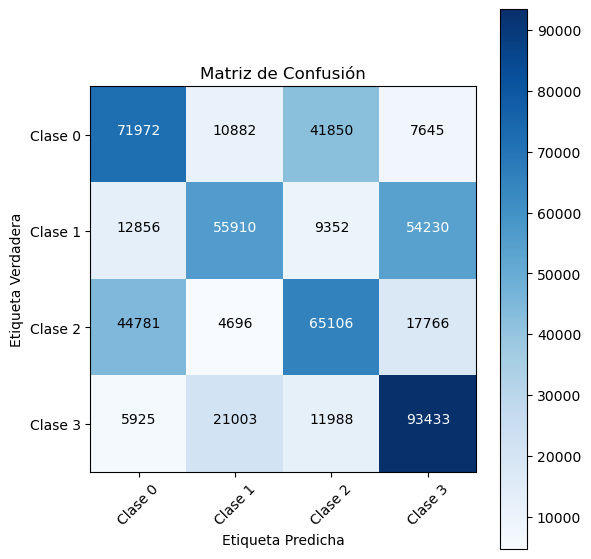

In [155]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import SMOTE

# Fit and transform preprocessing pipeline
X_prepro = preprocessing.fit_transform(X)

#SMOTE (Synthetic Minority Over-sampling Technique)
    #This technique generates synthetic samples for the minority class
    # other tecniques: Random Undersampling, reducing the number of samples in the majority classes

# Apply SMOTE to the preprocessed data
sampling_strategy = 'not majority'
X_res, y_res = SMOTE(sampling_strategy = sampling_strategy, 
                     random_state=42).fit_resample(X_prepro, y)

# Final pipeline with classifier
pipeline = ImbPipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, 
                                          max_depth=2, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, 
                                                    stratify= y_res,
                                                    random_state=42)

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Hacer predicciones 
y_pred2 = pipeline.predict(X_test)
metricas(y_test, y_pred2) 

### modelo 3
#### RandomUnderSampler

Accuracy: 0.5212631168578019
Precision: 0.5212631168578019
Recall: 0.5212631168578019
F1 Score: 0.5212631168578019
Confusion Matrix:
 [[3869  748 2693  385]
 [ 697 3265  662 3071]
 [2638  336 3921  801]
 [ 418 1512  775 4990]]
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.50      0.51      7695
           1       0.56      0.42      0.48      7695
           2       0.49      0.51      0.50      7696
           3       0.54      0.65      0.59      7695

    accuracy                           0.52     30781
   macro avg       0.52      0.52      0.52     30781
weighted avg       0.52      0.52      0.52     30781



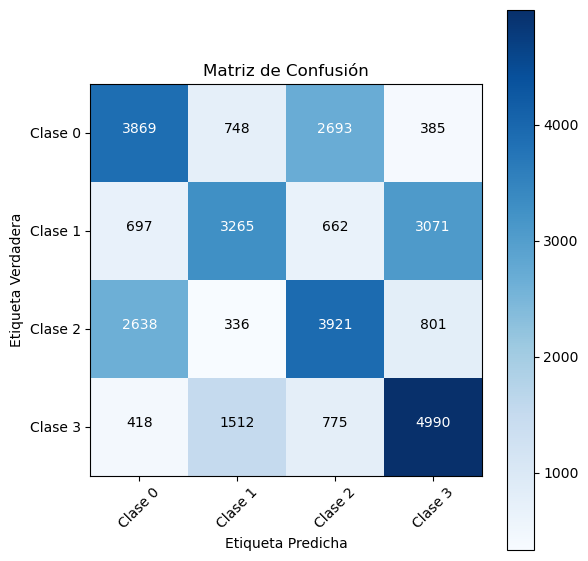

In [106]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler
# strategy to under simpling

sampling_strategy = {3:38476, 2: 38476, 1: 38476, 0: 38476}  
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)

X_res, y_res = rus.fit_resample(X, y)

# Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_res y_res, test_size=0.2, 
                                                    stratify= y_res, 
                                                    random_state=42)#, 

# Full pipeline with preprocessing, SMOTE, and classifier
pipeline = ImbPipeline([
    ('preprocessing', preprocessing),
    ('classifier', RandomForestClassifier(n_estimators=100, 
                                          max_depth=2,
                                          random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Metricas

y_pred3 = pipeline.predict(X_test)
metricas(y_test, y_pred3)

### modelo 4
### EditedNearestNeighbours

C:\Users\ivan.corredor\AppData\Local\anaconda3\Lib\site-packages\imblearn\pipeline.py:297: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, yt, **fit_params_last_step)
C:\Users\ivan.corredor\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ivan.corredor\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ivan.corred

Accuracy: 0.8533430551948701
Precision: 0.8533430551948701
Recall: 0.8533430551948701
F1 Score: 0.8533430551948701
Confusion Matrix:
 [[    0     0     0  7695]
 [    0     0     0   415]
 [    0     0     0  6573]
 [    0     0     0 85435]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      7695
           1       0.00      0.00      0.00       415
           2       0.00      0.00      0.00      6573
           3       0.85      1.00      0.92     85435

    accuracy                           0.85    100118
   macro avg       0.21      0.25      0.23    100118
weighted avg       0.73      0.85      0.79    100118



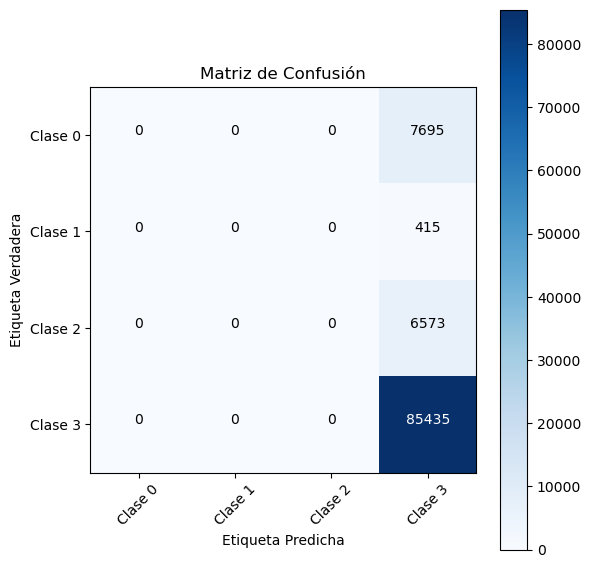

In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import EditedNearestNeighbours

#aplciar el preprocesamiento a el conjunto X
X_prepro = preprocessing.fit_transform(X)

# strategy to under simpling
sampling_strategy = "not minority" #"all"  #"majority", 'not majority'
rus = EditedNearestNeighbours(kind_sel="all", 
                              sampling_strategy = sampling_strategy)

X_res, y_res = rus.fit_resample(X_prepro, y)


# Final pipeline with classifier
pipeline = ImbPipeline([
    ('classifier', RandomForestClassifier(n_estimators=100, 
                                          max_depth=2, random_state=42))
])
# Split the dataset into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, 
                                                    stratify = y_res, 
                                                    random_state=42)#, 
# Fit the pipeline
pipeline.fit(X_train, y_train)

# Metricas

y_pred4 = pipeline.predict(X_test)
metricas(y_test, y_pred4)

In [181]:
y_res["TIPO_PER"].value_counts()

TIPO_PER
3    661743
2     32864
1      2077
0      1613
Name: count, dtype: int64

In [184]:
y_res["TIPO_PER"].value_counts()

TIPO_PER
3    427172
0     38476
2     32864
1      2077
Name: count, dtype: int64

### modelo 5
#### BalancedRandomForestClassifier

Accuracy: 0.606872512126683
Precision: 0.606872512126683
Recall: 0.606872512126683
F1 Score: 0.606872512126683
Confusion Matrix:
 [[ 3681   668  2937   409]
 [ 1974  6848  1374  6763]
 [ 8216  1127 14767  2779]
 [ 7793 23944 14309 86303]]
Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.48      0.25      7695
           1       0.21      0.40      0.28     16959
           2       0.44      0.55      0.49     26889
           3       0.90      0.65      0.76    132349

    accuracy                           0.61    183892
   macro avg       0.43      0.52      0.44    183892
weighted avg       0.74      0.61      0.65    183892



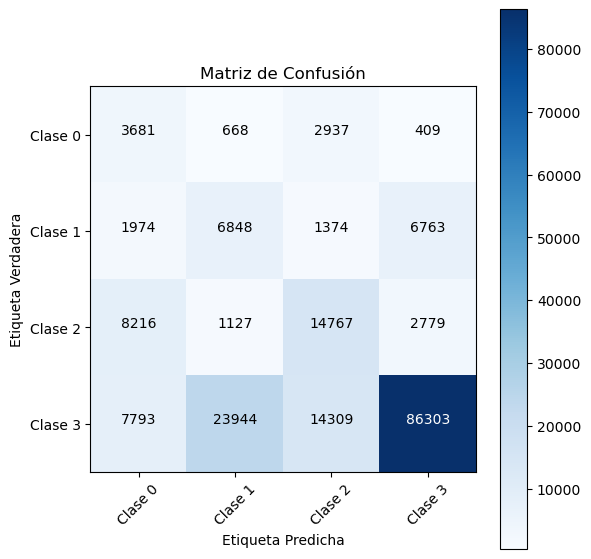

In [119]:
from imblearn.ensemble import BalancedRandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Full pipeline with preprocessing, SMOTE, and classifier
pipeline = ImbPipeline([
    ('preprocessing', preprocessing),
    ('classifier', BalancedRandomForestClassifier(n_estimators=100,
                                          max_depth=2,
                                          random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Hacer predicciones 
y_pred5 = pipeline.predict(X_test)
metricas(y_test, y_pred5)

## Conclusión - Mejor modelo

In [199]:
print("""El modelo 2 fue el de mejor desempñeo, basado en la estrategia de over simpling 'not majority' \n  
con el fin de balancear las muestras de cada una de las clases a clasificar en función de las \n 
características X. Así se obtuvieron las siguientes metrícas: \n 
Accuracy: 0.541034577206056 \n
Precision: 0.541034577206056 \n
Recall: 0.541034577206056 \n
F1 Score: 0.541034577206056 \n
Confusion Matrix: \n
 [[71972 10882 41850  7645] \n
 [12856 55910  9352 54230] \n
 [44781  4696 65106 17766] \n
 [ 5925 21003 11988 93433]] \n
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.54      0.54    132349
           1       0.60      0.42      0.50    132348
           2       0.51      0.49      0.50    132349
           3       0.54      0.71      0.61    132349

    accuracy                           0.54    529395
   macro avg       0.55      0.54      0.54    529395
weighted avg       0.55      0.54      0.54    529395
""")

El modelo 2 fue el de mejor desempñeo, basado en la estrategia de over simpling 'not majority' 
  
con el fin de balancear las muestras de cada una de las clases a clasificar en función de las 
 
características X. Así se obtuvieron las siguientes metrícas: 
 
Accuracy: 0.541034577206056 

Precision: 0.541034577206056 

Recall: 0.541034577206056 

F1 Score: 0.541034577206056 

Confusion Matrix: 

 [[71972 10882 41850  7645] 

 [12856 55910  9352 54230] 

 [44781  4696 65106 17766] 

 [ 5925 21003 11988 93433]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.54      0.54    132349
           1       0.60      0.42      0.50    132348
           2       0.51      0.49      0.50    132349
           3       0.54      0.71      0.61    132349

    accuracy                           0.54    529395
   macro avg       0.55      0.54      0.54    529395
weighted avg       0.55      0.54      0.54    529395



In [ ]:
# aplicar el preprocesamiento para convertir en dataframe
# X_train_prepared = preprocessing.fit_transform(X_train)
# # devolver el dataframe
# X_train_prepared_df = pd.DataFrame(
#     X_train_prepared,
#     columns= preprocessing.get_feature_names_out(),
#     index = X_train.index)
# X_train_prepared_df.head(10)